In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy.integrate import simps
import matplotlib.tri as tri
import matplotlib.pylab as pl


[0.  0.1 0.3 0.7 1.  2.  5. ] [1.e-02 1.e-01 1.e+00 1.e+01 5.e+01 1.e+02 1.e+03]


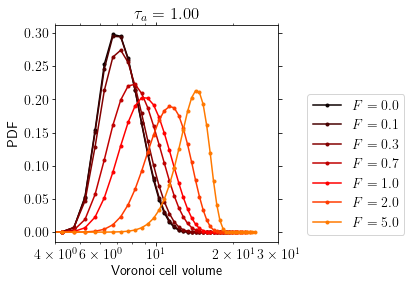

In [11]:
mpl.rcParams.update({'font.size':14, 'text.usetex':True})
# print(mpl.rcParams.keys)
fig,ax=plt.subplots(1,1,figsize=(4,4))
# ax.set_prop_cycle(cycler('color', plt.cm.RdBu))
fpath='../../data/SAC_exp/'
ind=4
colors = pl.cm.hot(np.linspace(0,1,12))

for (name,tp) in [('low',1)]:#,('mid',1.0), ('high',100)]:
    rgs=[]
    Fs=[]
    Tas=[]
    rg_eq=0
    count=0
    ax.clear()
    for fname in os.listdir(fpath+'Shape/'):
        if 'shape_descriptors' in fname and '.npz' in fname:
            T= float(fname.split('_')[ind].replace('T',''))
            F=float(fname.split('_')[ind+1].replace('F',''))
            Ta=float(fname.split('_')[ind+2].replace('Ta',''))
            kb=float(fname.split('_')[ind+7].replace('kb',''))
            Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
            R0=float(fname.split('_')[ind+4].replace('R0',''))
            dt=float(fname.split('_')[ind+8].replace('dt',''))
            # print(T,F,Ta,Esoft,R0)

            npzfile=np.load(fpath+'Shape/'+fname)
            Fs.append(F)
            Tas.append(Ta)
            # print(npzfile.files)
            rg_avg=simps(npzfile['rg'][0]*npzfile['rg'][1], npzfile['rg'][1])
            
            rgs.append(rg_avg)
            
            if F==0: rg_eq=rg_avg
            if F==0.0 or Ta==tp:
                ax.plot(npzfile['rg'][1], npzfile['rg'][0],'.-', label='$F={:.1f}$'.format(F),color=colors[count])
                count+=1
                ax.set_title('$\\tau_a={:.2f}$'.format(Ta))
                # print(vcv_avg)
    ax.legend(loc='lower left',bbox_to_anchor=(1.1,0))
    ax.semilogx()
    ax.set_xlim(4,30)
    ax.set_ylabel('PDF')
    ax.set_xlabel('Voronoi cell volume')
    print(np.unique(Fs),np.unique(Tas))
    # fig.savefig(fpath+'plots/VCV_{}Ta.png'.format(name),bbox_inches='tight', dpi=300)


/Users/sumitabha/anaconda3/envs/newopenmm/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


Text(0.5, 1.0, 'Average voronoi cell volume $\\langle V\\rangle/V_{eq}$')

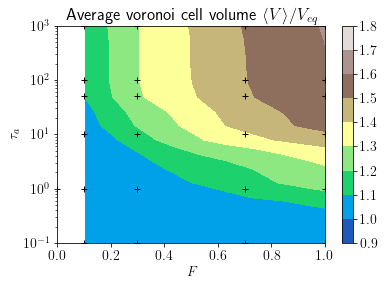

In [16]:
ax.clear()
Xi,Yi=np.meshgrid(np.linspace(0.0,2,20),np.logspace(-2,3,20))
triang=tri.Triangulation(Fs,Tas)
interpZ=tri.LinearTriInterpolator(triang,np.around(np.array(rgs)/rg_eq, 2))
Zi=interpZ(Xi,Yi)
plt.contourf(Xi, Yi, Zi, levels=np.arange(0.9,1.9,0.1),cmap='terrain')
plt.colorbar()
plt.contour(Xi, Yi, Zi, levels=[1.])
plt.plot(Fs,Tas,'k+')
plt.semilogy()
plt.xlabel('$F$')
plt.ylabel('$\\tau_a$')
plt.xlim(0,1)
plt.ylim(1e-1,1e3)
plt.title('Average voronoi cell volume $\\langle V\\rangle/V_{eq}$')
# plt.savefig(fpath+'/plots/normVCV_contour.png', dpi=300, bbox_inches='tight')